# Analysis of NASA Kepler Exoplanet Data

**Objective:** This project performs an exploratory data analysis on a dataset of over 2,300 confirmed exoplanets discovered by the Kepler Space Telescope. The goal is to identify key trends in exoplanet characteristics, including their size, temperature, and relationship to their host stars, culminating in an analysis to identify potentially habitable candidates.

**Skills Demonstrated:** Python, Pandas, Matplotlib, Data Cleaning, Data Visualization

In [1]:
import pandas as pd
print("Success! Pandas is ready to go.")

df = pd.read_csv('exoplanets.csv')
print("\nSuccessfully loaded the exoplanets.csv file. Here are the first 5 rows:")
df.head()


Success! Pandas is ready to go.

Successfully loaded the exoplanets.csv file. Here are the first 5 rows:


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [2]:
confirmed_planets_df = df[df['koi_disposition'] == 'CONFIRMED']

print(f"original number of entries: {len(df)}")
print(f"Number of confirmed planets: {len(confirmed_planets_df)}")

confirmed_planets_df.head()

original number of entries: 9564
Number of confirmed planets: 2357


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
confirmed_planets_df.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,2.357000e+03,2345.000000,2357.000000,2357.000000,2357.0,2357.0,2357.000000,2.356000e+03,2.356000e+03,2357.000000,...,2343.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2357.00000,2357.000000,2357.000000
mean,8.097056e+06,0.962857,0.198133,0.005940,0.0,0.0,27.706884,2.224126e-04,-2.224126e-04,157.578189,...,-124.297909,4.411244,0.089866,-0.106458,1.065797,0.175705,-0.149744,290.95981,44.360843,14.337261
std,2.584650e+06,0.143475,9.577990,0.076857,0.0,0.0,54.492454,1.260899e-03,1.260899e-03,42.687043,...,52.132108,0.235392,0.079409,0.064892,0.638132,0.143657,0.224811,4.75516,3.569286,1.229623
min,7.574500e+05,0.000000,0.000000,0.000000,0.0,0.0,0.341842,2.700000e-08,-5.100000e-02,120.565925,...,-712.000000,2.410000,0.000000,-0.748000,0.118000,0.000000,-4.943000,280.20660,36.577381,8.224000
25%,6.106282e+06,0.992000,0.000000,0.000000,0.0,0.0,5.144365,1.157500e-05,-1.300000e-04,134.250610,...,-152.000000,4.290000,0.036000,-0.126000,0.808000,0.066000,-0.161000,287.25668,41.420158,13.659000
50%,8.352537e+06,1.000000,0.000000,0.000000,0.0,0.0,11.448658,3.900000e-05,-3.900000e-05,140.678930,...,-112.000000,4.455000,0.064000,-0.105000,0.968000,0.160000,-0.089500,291.14951,44.327518,14.591000
75%,1.016627e+07,1.000000,0.000000,0.000000,0.0,0.0,25.961901,1.300000e-04,-1.157500e-05,171.376107,...,-83.500000,4.557000,0.130000,-0.052000,1.199250,0.243250,-0.055000,294.78915,47.182861,15.259000
max,1.283487e+07,1.000000,465.000000,1.000000,0.0,0.0,1071.232624,5.100000e-02,-2.700000e-08,589.719750,...,0.000000,5.274000,0.765000,0.000000,19.530000,2.551000,0.000000,301.72076,52.149132,17.475000


In [4]:
confirmed_planets_df.isnull().sum()

kepid                   0
kepoi_name              0
kepler_name             0
koi_disposition         0
koi_pdisposition        0
koi_score              12
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1         1
koi_period_err2         1
koi_time0bk             0
koi_time0bk_err1        1
koi_time0bk_err2        1
koi_impact              1
koi_impact_err1         1
koi_impact_err2         1
koi_duration            0
koi_duration_err1       1
koi_duration_err2       1
koi_depth               1
koi_depth_err1          1
koi_depth_err2          1
koi_prad                1
koi_prad_err1           1
koi_prad_err2           1
koi_teq                 1
koi_teq_err1         2357
koi_teq_err2         2357
koi_insol               1
koi_insol_err1          1
koi_insol_err2          1
koi_model_snr           1
koi_tce_plnt_num        8
koi_tce_delivname       8
koi_steff               1
koi_steff_er

## Question 1: What is the size distribution of exoplanet sizes in terms of Earth's radius? 

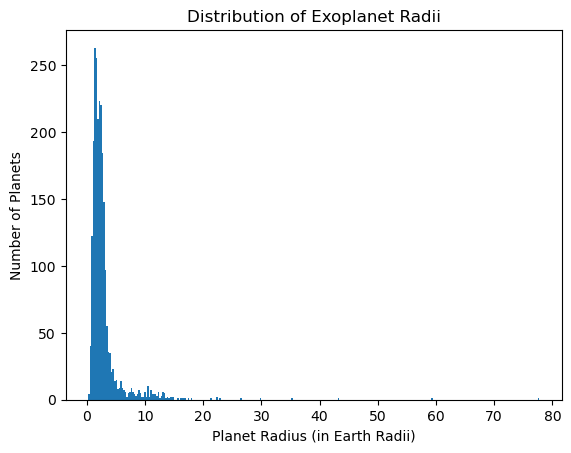

In [5]:
#import the plotting library
import matplotlib.pyplot as plt

# crate a histogram of the radii of confirmed planets
plt.hist(confirmed_planets_df['koi_prad'], bins=300)

# Add labels to the plot
plt.title('Distribution of Exoplanet Radii')
plt.xlabel('Planet Radius (in Earth Radii)')
plt.ylabel('Number of Planets')

# display plot
plt.show()

**Conclusion:** The histogram provides a clear picture of exoplanet size distribution. The vast majority of exoplanets fall between the range of 1 and 4 times earth's radius with single outliers reaching close to 80 times earth's radius. It is clear that most of the observable exoplanets are Super-Earths or Mini-Neptunes.

## Question 2: How does the orbital period relate to temperature?

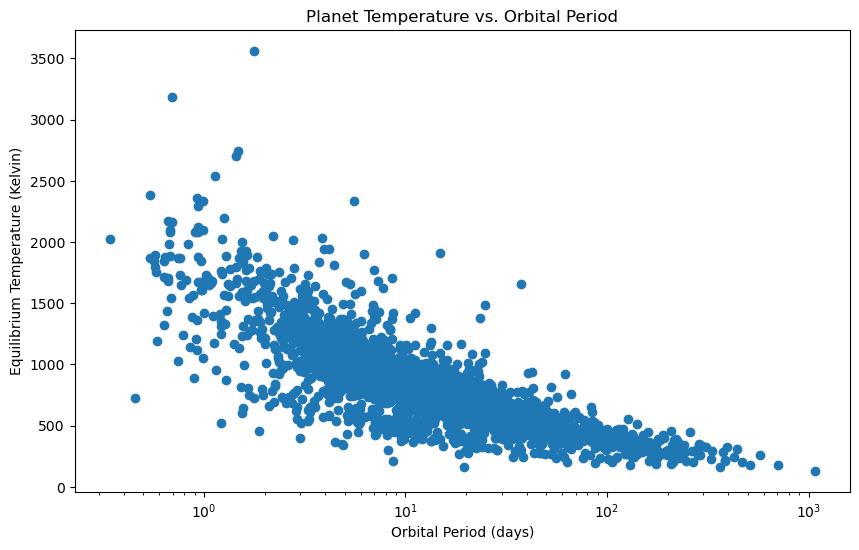

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(confirmed_planets_df['koi_period'], confirmed_planets_df['koi_teq'])
plt.title('Planet Temperature vs. Orbital Period')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Equilibrium Temperature (Kelvin)')

# Changes the x-axis to a log scale so the dense clusters will be more obvious
plt.xscale('log')

plt.show()

**Conclusion:** It is clear from the scatter plot that there is an inverse relationship between orbital period and the equilibrium temperature of the exoplanets. As the orbital period increases, the temperature decreases. Faster orbital periods result in higher equilibrium periods. This is consistent with physical laws, as planets with longer periods are typically further from their sun and as such receive less energy.

## Question 3: What is the temperature distribution of the planet-hosting stars?

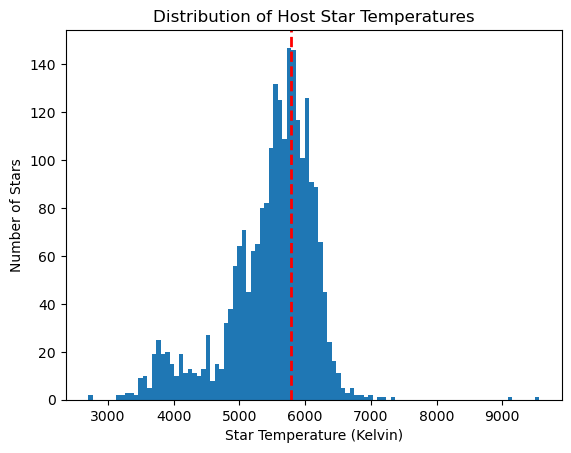

In [7]:
# Creating a histogram that shows the temperature of our planets with a 
# vertical line indicating the temperature of our sun

sun_temp = 5778

plt.hist(confirmed_planets_df['koi_steff'], bins=100)
plt.axvline(sun_temp, color='red', linestyle='dashed', linewidth=2)
plt.title('Distribution of Host Star Temperatures')
plt.xlabel('Star Temperature (Kelvin)')
plt.ylabel('Number of Stars')
plt.show()

**Conclusion:** It seems the majority of stars fall in a semi-gaussian distribution with our sun being close to the top of the bell curve. More stars tend to be on the colder side than on the higher range of temperatures indicating that much higher temperatures might not be suitable for the formation of exoplanets. The distribution peaks in the 4500K to 6000K range, indicating that K-type and G-type stars are the most common exoplanet hosts in this dataset.

## Final Analysis: Identifying Potentially Habitable Planets

To find potentially habitable candidates we need to filter our data based on whether or not the planet is terrestrial and lcoated in the goldilocks zone. To that end I analyze which planets meet the following criteria.

+ The insolation of the planet is between 0.4 and 1.5 times Earth's

+ It is a terrestrial planet which can be indicated by the planet having a radius less than that of 2 earth radii.

First, I will create a dataframe containing only these exoplanets, then, I will create a visual comparison of these planets to all confirmed exoplanets to establish how common potentially habitable planets are.

Number of potentially habitable exoplanet candidates found: 19


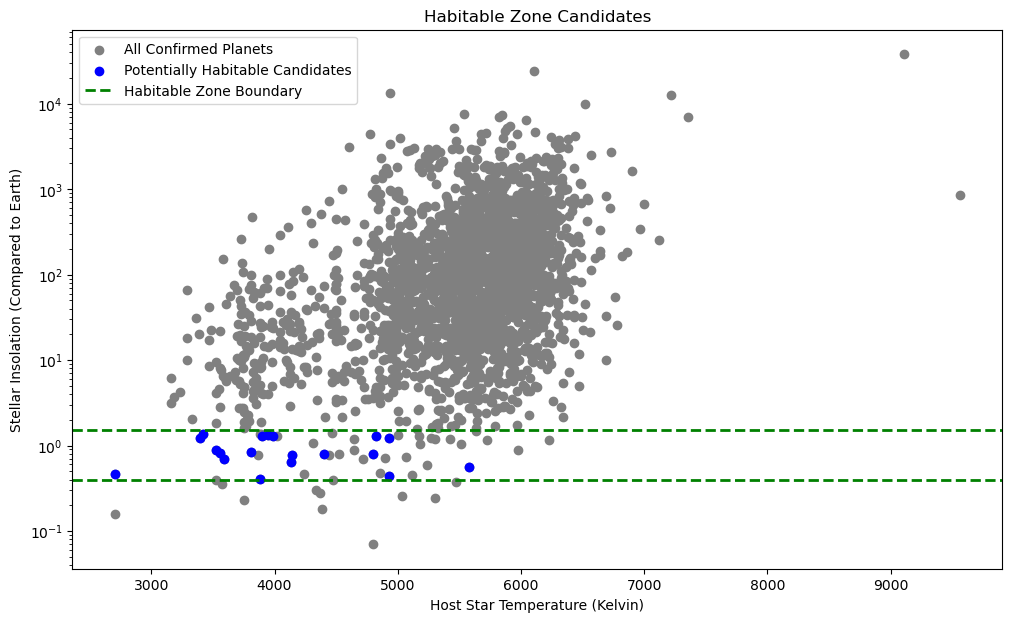

In [8]:
# define the habitable planets
is_habitable = (
    (confirmed_planets_df['koi_prad'] < 2) &
    (confirmed_planets_df['koi_insol'] > 0.4) &
    (confirmed_planets_df['koi_insol'] < 1.5)
)

# Create the new DataFrame of habitable planets
habitable_planets_df = confirmed_planets_df[is_habitable]

# print the number of candidates found
print(f"Number of potentially habitable exoplanet candidates found: {len(habitable_planets_df)}")

# creating scatterplot of all confirmed planets
plt.figure(figsize=(12,7))
plt.scatter(
    confirmed_planets_df['koi_steff'],
    confirmed_planets_df['koi_insol'],
    c='grey',
    label='All Confirmed Planets'
)

#creating a scatterplot of all potentially habitable planets
plt.scatter(
    habitable_planets_df['koi_steff'],
    habitable_planets_df['koi_insol'],
    c='blue',
    label='Potentially Habitable Candidates'
)

# Add labels and convert y-axis to a logarithmic scale for visibility

plt.title('Habitable Zone Candidates')
plt.axhline(1.5,color='green', linestyle='dashed', linewidth=2, label = 'Habitable Zone Boundary')
plt.axhline(0.4,color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Host Star Temperature (Kelvin)')
plt.ylabel('Stellar Insolation (Compared to Earth)')
plt.yscale('log')
plt.legend()
plt.show()

**Conclusion:** This data shows the expected. potentially habitable planets are exceptionally uncommon in the universe. With only 19 total candidates found out of 2357 total confirmed exoplanets. The scatter plot reveals that this is because most of the exoplanets receive a much higher dose of energy from their host star than is necessary for habitablility. Host star temperature does not appear to be the deciding factor in what prevents a planet from being habitable. In fact we can see that life could exist from relatively cold stars to stars that are hotter than our sun. This analysis demonstrates that while potentially habitable worlds are rare, they are not exclusive to sun-like stars, which broadens our search for life in the galaxy.